In [1]:
%run cleaning_purchases_individuals.ipynb
df_purchases_cleaned_v3, df_per_region = import_df() # type: ignore

import seaborn as sns

In [208]:
# i am going to filter by "last_online_purchase = in the 12 months" and "grouped_individuals = All individuals" to have a general view

df_purchases_global = df_purchases_cleaned_v3[df_purchases_cleaned_v3['last_online_purchase'] == "in the 12 months"]
df_purchases_global = df_purchases_global[df_purchases_global['grouped_individuals'] == "All individuals"].reset_index()
df_purchases_global = df_purchases_global.drop(columns = "index") # remove the column index for better visualization

In [209]:
df_cleaned = df_purchases_global.drop(columns=['last_online_purchase', 'grouped_individuals']) # dropping "last_online_purchase" and "grouped_individuals" columns	

In [210]:
df_cleaned.set_index('country', inplace=True) # set country as index

df_transposed = df_cleaned.T # transposing DF to have years as rows and country as columns

df_transposed.index = df_transposed.index.astype(int) # Convert the index (years) to integers for proper plotting /!\

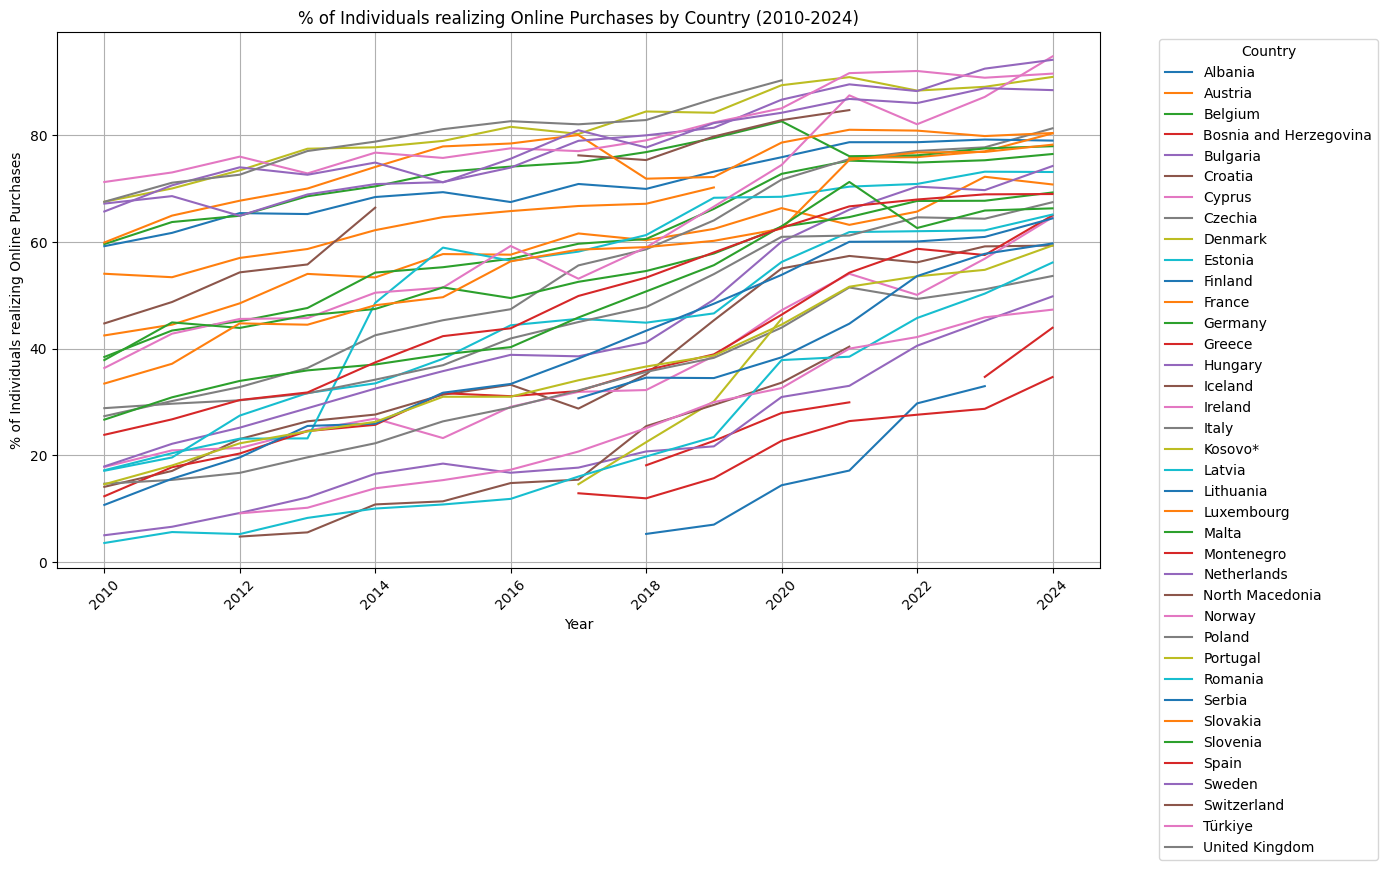

In [5]:
# Plot the data
plt.figure(figsize=(14, 8))
for country in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[country], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('% of Individuals realizing Online Purchases')
plt.title('% of Individuals realizing Online Purchases by Country (2010-2024)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# This is too messy and we cannot have conclusons

# % of Individuals realizing Online Purchases by European Region (2010-2024)

In [6]:
# Lets try to simplify by grouping countries per regions

# Drop unnecessary columns
df_cleaned = df_per_region.drop(columns=['last_online_purchase', 'grouped_individuals'])

# Group by region and calculate the mean for each year
df_grouped = df_cleaned.groupby('region').mean(numeric_only=True).T

# Convert the index (years) to integers for proper plotting
df_grouped.index = df_grouped.index.astype(int)

df_grouped

region,Central Europe,Eastern Europe,Northern Europe,Southern Europe,Western Europe
2010,20.836042,16.477071,30.544248,16.832047,28.977845
2011,21.485843,17.011796,31.385535,18.746100,29.241650
2012,22.986310,17.459568,32.296752,19.020581,29.504212
2013,23.992379,19.537656,32.757510,20.217949,30.903652
2014,25.178000,21.040949,33.357128,21.456762,31.604541
2015,25.716571,22.226145,33.382565,22.472912,32.355347
2016,26.544381,23.425298,34.678800,23.437333,32.770550
2017,27.772256,23.051818,34.762402,24.615435,33.537276
2018,28.169806,23.147874,34.796881,25.379683,33.200840
2019,29.529339,24.555570,35.811333,26.344141,34.049051


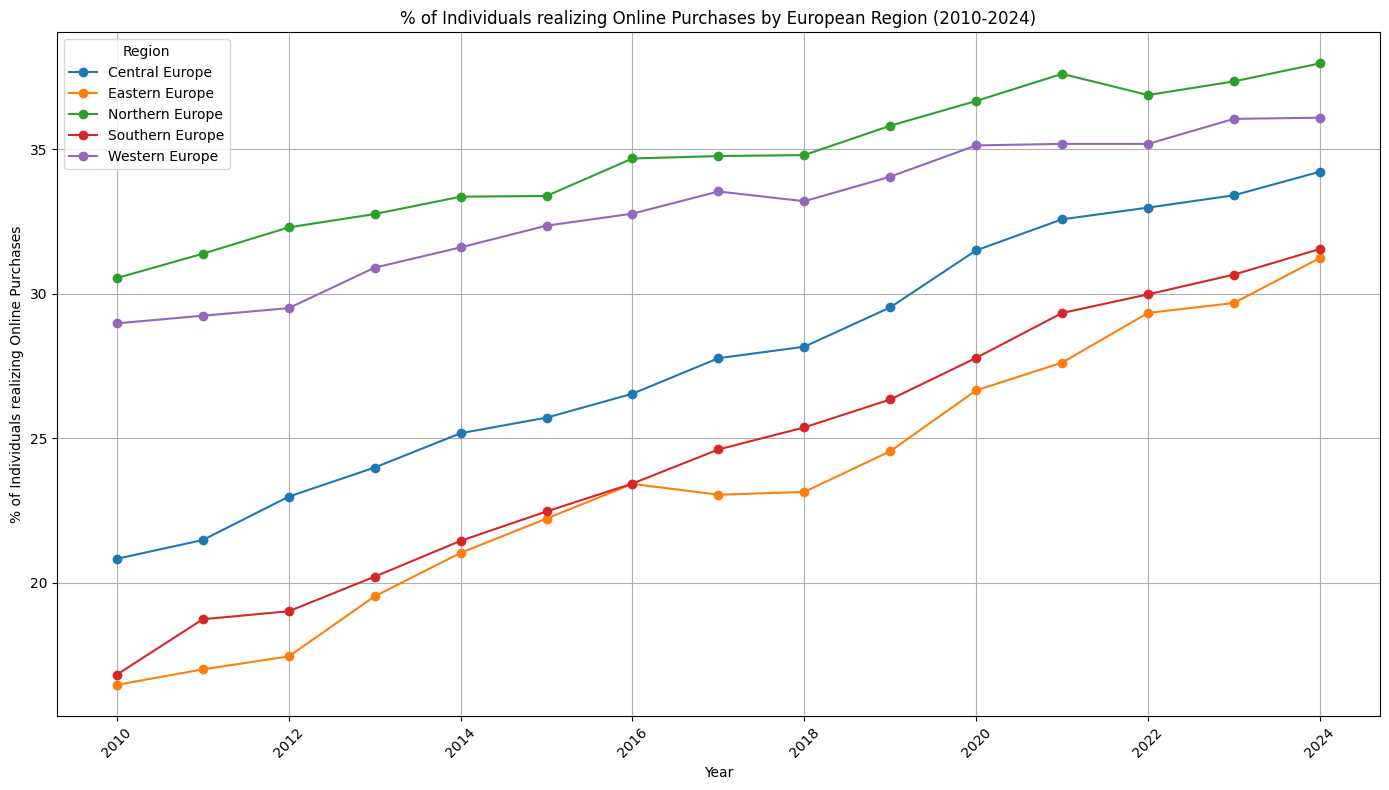

In [7]:
# Plot the data
plt.figure(figsize=(14, 8))
for region in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[region], marker='o', label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('% of Individuals realizing Online Purchases')
plt.title('% of Individuals realizing Online Purchases by European Region (2010-2024)')
plt.legend(title='Region', loc='upper left')

# Add grid for better readability
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# This one is looking good, maybe we can cross-check it with connection availability :)

# % Individuals purchasing online on all EU countries - Year Pick

In [206]:
def purchasing_year(year):
    df_purchases_global.columns = df_purchases_global.columns.astype(str)
    df_purchasingyear = df_purchases_global[['country', year]].dropna().sort_values(year, ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='2020', y='country', data=df_2020) # SEABORN!
    plt.xlabel('Percentage of Individuals purchasing online at least once')
    plt.title(f'% Individuals purchasing online in {year}')
    print(plt.show())

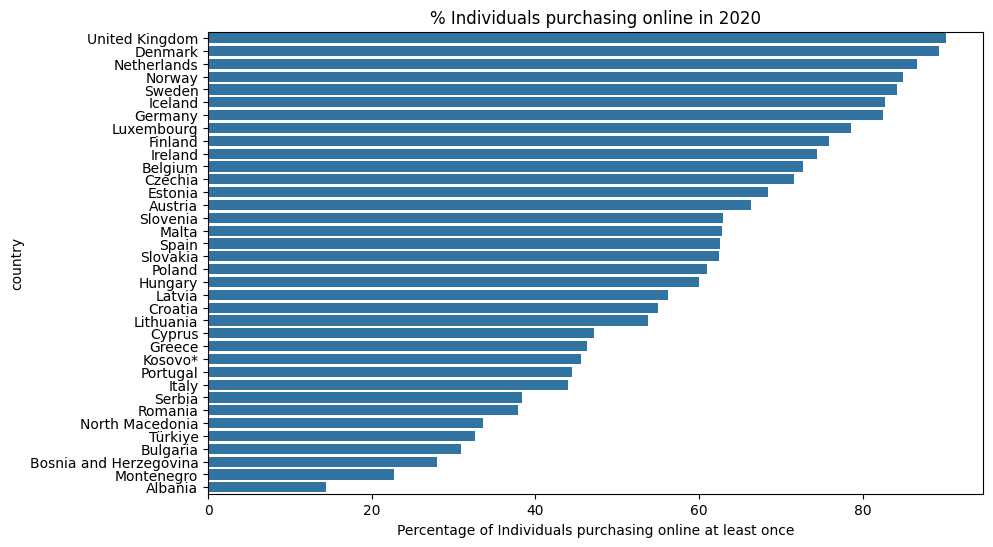

None


In [211]:
purchasing_year("2020")

# Education level

In [11]:
# i am going to filter by "last_online_purchase = in the 12 months" and "grouped_individuals = educations" to have the detail
educationlevel = ["Individuals aged 16-24 with high formal education", "Individuals aged 16-24 with low education", "Individuals aged 16-24 with medium formal education", "Individuals aged 25 to 54 with high formal education", "Individuals aged 25 to 54 with low formal education", "Individuals aged 25 to 54 with medium formal education", "Individuals aged 55 to 74 with high formal education", "Individuals aged 55 to 74 with low formal education", "Individuals aged 55 to 74 with medium formal education"]

df_purchases_education = df_purchases_cleaned_v3[df_purchases_cleaned_v3['last_online_purchase'] == "in the 12 months"]
df_purchases_education = df_purchases_education[df_purchases_education['grouped_individuals'].isin(educationlevel)].reset_index(drop=True)

#also removing the values "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)" or "European Union - 27 countries (from 2020)"
df_purchases_education = df_purchases_education[~df_purchases_education['country'].isin(["Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)", "European Union - 27 countries (from 2020)"])]

df_purchases_education = df_purchases_education.drop(columns="last_online_purchase") # drop last_online_purchase column

df_purchases_education

,grouped_individuals,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Individuals aged 16-24 with high formal education,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.20,23.83,41.07,46.88,58.62,87.27,NaN
1,Individuals aged 16-24 with high formal education,Austria,NaN,NaN,NaN,93.65,87.51,91.53,93.62,94.38,91.43,86.49,94.19,93.40,86.76,80.95,88.21
2,Individuals aged 16-24 with high formal education,Belgium,62.76,72.06,73.61,72.36,85.03,79.64,82.92,87.81,95.11,88.09,89.42,93.00,97.57,94.95,93.28
3,Individuals aged 16-24 with high formal education,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.64,70.57,29.80,33.18,NaN,48.86,72.83
4,Individuals aged 16-24 with high formal education,Bulgaria,21.06,47.48,29.68,45.05,50.48,78.69,51.07,64.42,57.30,65.74,75.27,66.17,91.66,94.65,85.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Individuals aged 55 to 74 with medium formal e...,Spain,15.64,15.06,20.89,18.67,26.75,31.05,33.46,37.96,43.98,44.74,47.06,54.82,54.88,54.14,57.30
338,Individuals aged 55 to 74 with medium formal e...,Sweden,45.46,54.17,52.87,54.66,59.84,50.70,68.43,64.32,65.86,66.33,74.90,75.82,76.75,83.49,82.40
339,Individuals aged 55 to 74 with medium formal e...,Switzerland,NaN,NaN,NaN,NaN,41.39,NaN,NaN,59.20,NaN,57.28,NaN,65.99,NaN,67.87,NaN
340,Individuals aged 55 to 74 with medium formal e...,Türkiye,0.90,NaN,3.64,5.40,4.48,7.39,7.35,9.95,11.17,11.65,15.35,19.61,20.85,21.87,27.34


In [12]:
df_purchases_education["grouped_individuals"].value_counts()

grouped_individuals
Individuals aged 16-24 with high formal education         38
Individuals aged 16-24 with low education                 38
Individuals aged 16-24 with medium formal education       38
Individuals aged 25 to 54 with high formal education      38
Individuals aged 25 to 54 with low formal education       38
Individuals aged 25 to 54 with medium formal education    38
Individuals aged 55 to 74 with high formal education      38
Individuals aged 55 to 74 with low formal education       38
Individuals aged 55 to 74 with medium formal education    38
Name: count, dtype: int64

In [13]:
# Lets try to group by education level low - medium - high
# Define education
from dictionaries import education # importing education dictionary from dictionaries.py


df_purchases_edugrouped = df_purchases_education.copy() # Reverse mapping from education description to level /!\

education_to_level = {education_desc: level for level, descriptions in education.items() for education_desc in descriptions}

# Add a new 'education_level' column using the mapping
df_purchases_edugrouped['education_level'] = df_purchases_edugrouped['grouped_individuals'].map(education_to_level)

df_cleaned2 = df_purchases_edugrouped.drop(columns='grouped_individuals') # Drop no needed columns

df_grouped2 = df_cleaned2.groupby('education_level').mean(numeric_only=True).T # Group by the 'education_level' and calculate the mean for each year

df_grouped2.index = df_grouped2.index.astype(int) # Convert the index (years) to integers for proper plotting

df_grouped2

education_level,High,Low,Medium
2010,49.394505,22.267159,35.140645
2011,53.815904,24.335730,39.431000
2012,53.398333,23.893333,38.849394
2013,58.232809,25.764000,42.645833
2014,62.278444,29.457959,46.733163
2015,62.940682,28.279451,46.936667
2016,66.463448,32.280543,50.312826
2017,65.597041,34.537573,51.906481
2018,65.611176,33.932091,50.967387
2019,69.328585,37.735586,55.903333


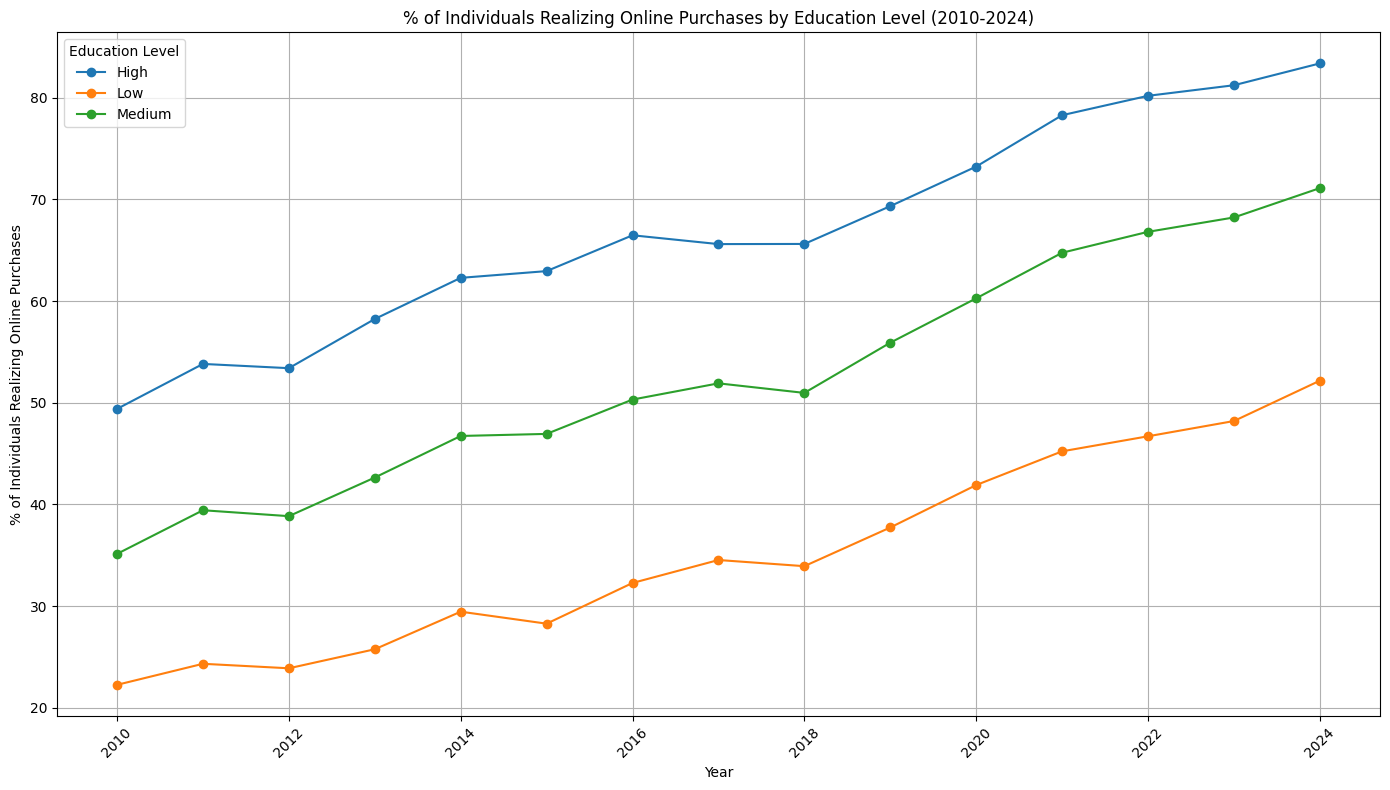

In [14]:
# Define the DataFrame (assuming df_grouped2 is already created as you described)
# Columns are 'High', 'Low', 'Medium' and index are the years

plt.figure(figsize=(14, 8))

# Iterate over each education level and plot its respective line on the graph
for education_level in df_grouped2.columns:
    plt.plot(df_grouped2.index, df_grouped2[education_level], marker='o', label=education_level)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('% of Individuals Realizing Online Purchases')
plt.title('% of Individuals Realizing Online Purchases by Education Level (2010-2024)')

# Add a legend to identify education levels in the plot
plt.legend(title='Education Level', loc='upper left')

# Add a grid to improve readability
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Optimize layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

# Grouping per ages

In [16]:
# removing all row values that add have more info than just group age.
# list with the values to keep:
age_groups = ["Individuals, 16 to 24 years old", "Individuals, 25 to 34 years old", "Individuals, 35 to 44 years old", "Individuals, 45 to 54 years old", "Individuals, 55 to 64 years old", "Individuals, 65 to 74 years old"]

df_purchases_agegrouped = df_purchases_cleaned_v3[df_purchases_cleaned_v3['last_online_purchase'] == "in the 12 months"]
df_purchases_agegrouped = df_purchases_agegrouped[df_purchases_agegrouped['grouped_individuals'].isin(age_groups)].reset_index(drop=True)

df_purchases_agegrouped = df_purchases_agegrouped.drop(columns='last_online_purchase') # Drop no needed columns

#also removing the values "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)" or "European Union - 27 countries (from 2020)"
df_purchases_agegrouped = df_purchases_agegrouped[~df_purchases_agegrouped['country'].isin(["Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)", "European Union - 27 countries (from 2020)"])]


df_purchases_agegrouped

,grouped_individuals,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"Individuals, 16 to 24 years old",Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.36,11.90,27.14,36.08,45.27,68.28,NaN
1,"Individuals, 16 to 24 years old",Austria,51.05,61.53,59.48,68.86,77.26,80.65,81.07,86.72,81.99,80.99,87.43,77.82,81.19,84.39,78.14
2,"Individuals, 16 to 24 years old",Belgium,41.77,49.51,52.38,53.13,62.22,66.68,66.68,69.76,71.91,79.97,80.85,87.87,82.68,83.93,81.77
3,"Individuals, 16 to 24 years old",Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.38,61.12,38.99,43.84,NaN,59.19,66.00
4,"Individuals, 16 to 24 years old",Bulgaria,8.71,11.48,13.77,20.87,32.63,34.39,32.79,30.95,34.87,36.09,47.72,45.04,56.49,63.05,59.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,"Individuals, 65 to 74 years old",Spain,4.07,4.75,5.77,5.19,7.43,9.39,10.25,14.80,16.79,18.35,24.89,30.07,30.42,32.98,33.22
224,"Individuals, 65 to 74 years old",Sweden,31.11,35.25,40.25,41.62,49.55,44.52,55.23,49.85,55.18,53.80,61.42,66.79,66.52,73.74,73.23
225,"Individuals, 65 to 74 years old",Switzerland,NaN,NaN,NaN,NaN,35.02,NaN,NaN,50.50,NaN,54.39,NaN,59.11,NaN,55.12,NaN
226,"Individuals, 65 to 74 years old",Türkiye,0.55,NaN,0.34,0.56,0.91,1.01,1.24,1.15,1.98,2.39,3.55,4.25,5.14,5.15,6.49


In [17]:
# I am detecting that those NaN seem to be values = 0 in most of cases so going to fill those NaN with 0:
df_purchases_agegrouped.fillna(0, inplace=True)

In [18]:
# going to group by grouped_individuals mean:
df_age_meanvalues = df_purchases_agegrouped.groupby('grouped_individuals').mean(numeric_only=True)

df_age_meanvalues

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
grouped_individuals,,,,,,,,,,,,,,,
"Individuals, 16 to 24 years old",34.579211,38.277632,41.585789,44.495000,50.779211,50.516053,50.745000,60.702105,62.066053,69.282895,66.586053,70.782632,64.275000,72.442105,71.613158
"Individuals, 25 to 34 years old",40.896316,43.380789,46.839211,49.401579,54.791053,54.246842,54.875789,63.937368,65.588684,71.792895,72.821579,76.393947,70.189737,75.388947,75.536316
"Individuals, 35 to 44 years old",34.108947,36.967368,40.737895,42.199211,48.150789,46.958684,48.675263,57.356842,57.903684,64.319474,67.285263,71.139211,65.025000,71.190526,71.717895
"Individuals, 45 to 54 years old",25.856316,28.082105,30.904211,32.665789,37.885789,37.288684,37.860263,45.255789,46.675526,53.349474,55.894211,60.876316,56.046316,61.179474,62.744737
"Individuals, 55 to 64 years old",17.007368,18.736579,20.680263,22.020789,25.863947,25.092632,26.361579,32.392368,32.072632,38.022632,40.794211,45.549474,41.859474,45.765789,48.320000
"Individuals, 65 to 74 years old",7.653158,9.837632,11.343684,12.557368,15.633947,14.888158,16.579211,19.555000,19.202105,22.941053,25.798421,30.677368,26.203158,29.937632,31.640000


In [19]:
df_age_meanvalues = df_age_meanvalues.T # TRANSPOSING for plotting!

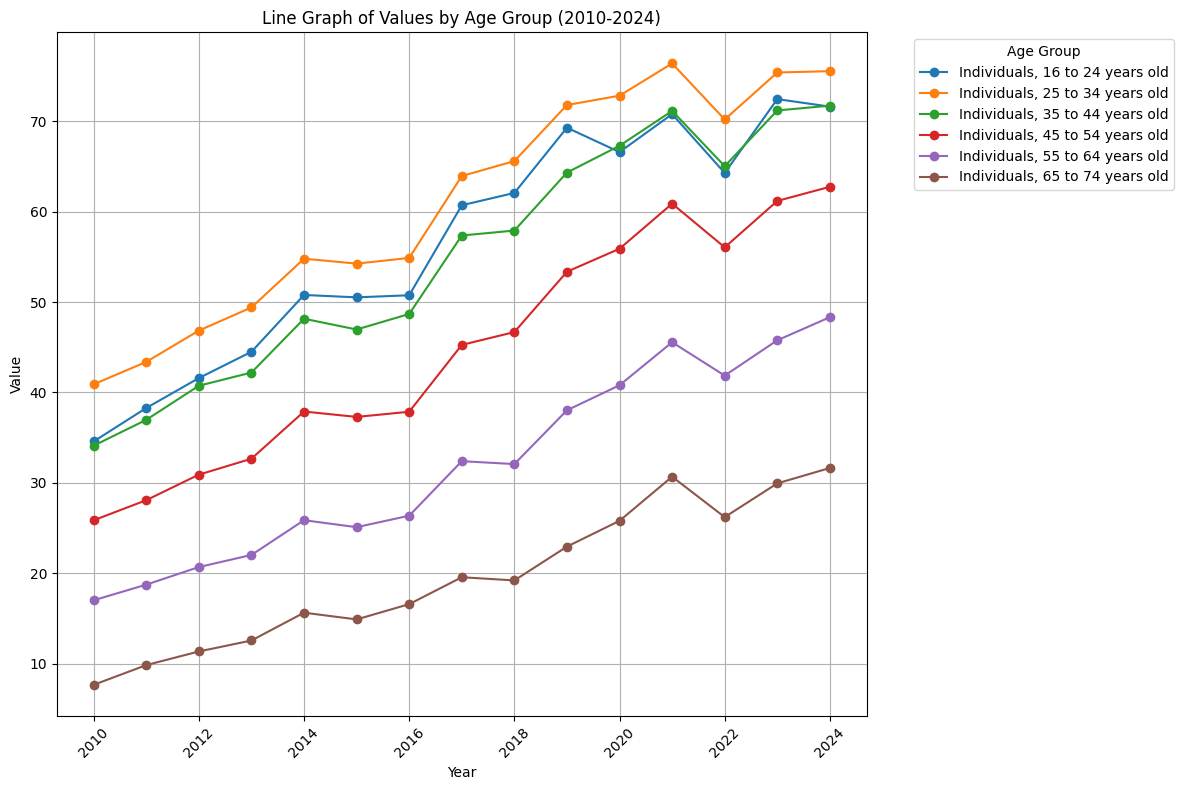

In [20]:
# Plotting
plt.figure(figsize=(12, 8))
for column in df_age_meanvalues.columns:
    plt.plot(df_age_meanvalues.index, df_age_meanvalues[column], marker='o', label=column)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph of Values by Age Group (2010-2024)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Individuals living places
we can use that to compare it with the available conectivity

In [139]:
# list with the values to keep:
living_area = ["Individuals living in cities", "Individuals living in rural areas", "Individuals living in towns and suburbs"]

df_purchases_livinggroup = df_purchases_cleaned_v3[df_purchases_cleaned_v3['last_online_purchase'] == "in the 12 months"]
df_purchases_livinggroup = df_purchases_livinggroup[df_purchases_livinggroup['grouped_individuals'].isin(living_area)].reset_index(drop=True)

df_purchases_livinggroup = df_purchases_livinggroup.drop(columns='last_online_purchase') # Drop no needed columns

df_purchases_livinggroup

,grouped_individuals,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Individuals living in cities,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.18,35.62,NaN
1,Individuals living in cities,Austria,44.53,46.59,49.54,59.38,55.74,61.28,61.22,63.94,60.59,63.59,69.55,68.54,67.39,74.61,70.98
2,Individuals living in cities,Belgium,38.93,43.00,43.40,48.02,52.90,52.76,51.26,53.94,55.53,59.75,68.40,71.15,71.30,72.56,72.31
3,Individuals living in cities,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.11,45.61
4,Individuals living in cities,Bulgaria,8.67,10.20,19.20,18.43,23.47,23.95,22.73,23.06,27.04,26.83,38.81,40.80,51.58,53.10,58.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Individuals living in towns and suburbs,Slovenia,32.51,30.40,40.68,36.34,35.98,39.16,42.79,45.48,50.90,59.95,63.20,70.49,63.79,67.62,67.51
100,Individuals living in towns and suburbs,Spain,25.90,23.28,30.36,31.72,35.67,42.02,42.48,49.50,50.52,53.28,59.57,64.35,65.27,65.38,68.15
101,Individuals living in towns and suburbs,Sweden,66.62,73.58,75.18,73.23,74.53,70.21,75.48,81.73,78.18,82.60,83.61,85.92,84.43,88.55,88.43
102,Individuals living in towns and suburbs,Switzerland,NaN,NaN,NaN,NaN,67.48,NaN,NaN,77.40,NaN,79.77,NaN,82.69,NaN,83.66,NaN


In [23]:
# going to group by grouped_individuals mean:
df_living_meanvalues = df_purchases_livinggroup.groupby('grouped_individuals').mean(numeric_only=True)

df_living_meanvalues

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
grouped_individuals,,,,,,,,,,,,,,,
Individuals living in cities,38.273448,41.606333,43.199583,48.519655,51.671935,52.909655,54.356552,57.779032,56.840323,61.759394,67.197742,71.722258,71.242759,71.924194,74.583000
Individuals living in rural areas,32.036333,35.687333,35.327917,40.494483,44.342258,45.413103,47.651034,51.602581,48.955484,54.413939,58.804839,64.127419,63.453793,64.674516,67.706667
Individuals living in towns and suburbs,37.622857,39.265926,39.224231,43.541724,47.590000,49.207586,50.954483,54.539032,52.565161,58.327576,63.318710,67.714839,66.113448,69.010667,71.980000


In [24]:
df_living_meanvalues = df_living_meanvalues.T # TRANSPOSING!

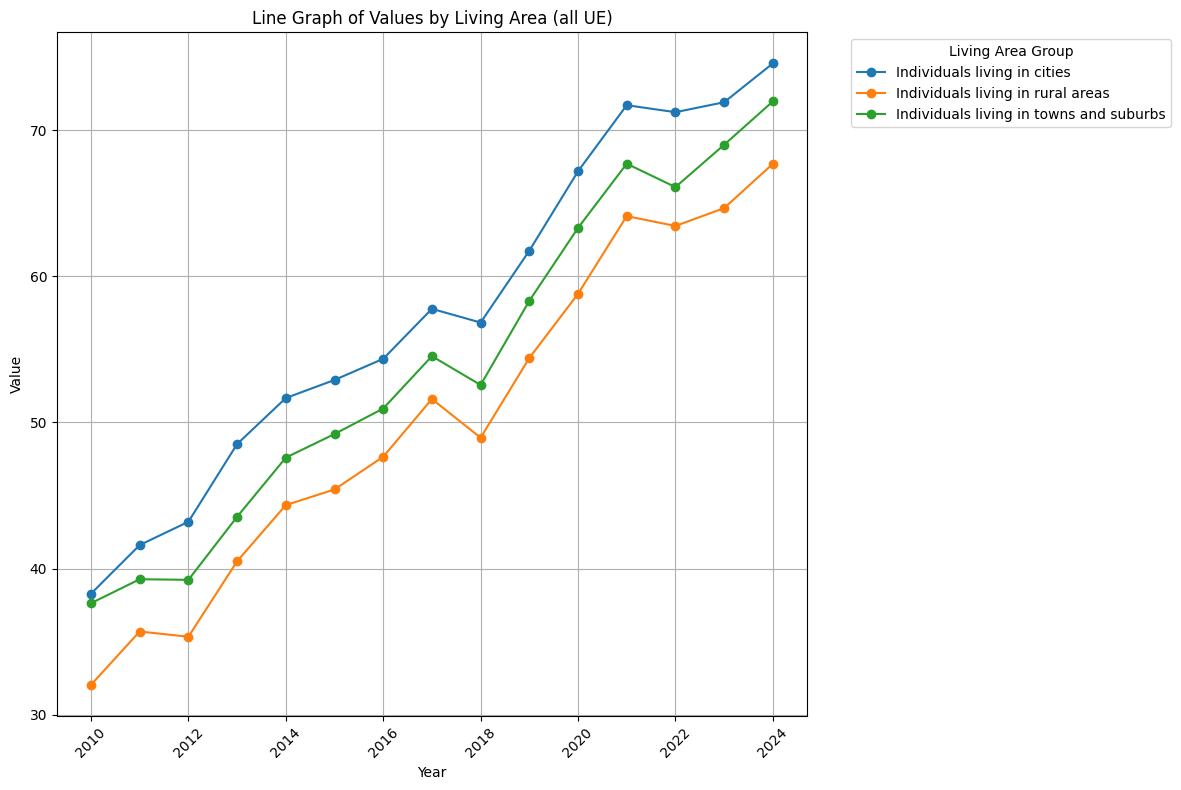

In [155]:
# Plotting
plt.figure(figsize=(12, 8))
for column in df_living_meanvalues.columns:
    plt.plot(df_living_meanvalues.index, df_living_meanvalues[column], marker='o', label=column)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph of Values by Living Area (all UE)')
plt.legend(title='Living Area Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [147]:
#testing something (trying to deepdive on the living+ groups)
df_per_regionall = df_per_region[df_per_region['last_online_purchase'] == "in the 12 months"]
df_per_regionall = df_per_regionall.drop(columns = "last_online_purchase") # remove the extra columns
df_per_regionall = df_per_regionall[df_per_regionall['grouped_individuals'].isin(living_area)].reset_index(drop=True)

df_per_regionall

,grouped_individuals,country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,region
0,Individuals living in cities,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.18,35.62,NaN,Eastern Europe
1,Individuals living in cities,Austria,44.53,46.59,49.54,59.38,55.74,61.28,61.22,63.94,60.59,63.59,69.55,68.54,67.39,74.61,70.98,Western Europe
2,Individuals living in cities,Belgium,38.93,43.00,43.40,48.02,52.90,52.76,51.26,53.94,55.53,59.75,68.40,71.15,71.30,72.56,72.31,Western Europe
3,Individuals living in cities,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.11,45.61,Eastern Europe
4,Individuals living in cities,Bulgaria,8.67,10.20,19.20,18.43,23.47,23.95,22.73,23.06,27.04,26.83,38.81,40.80,51.58,53.10,58.34,Eastern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Individuals living in towns and suburbs,Slovenia,32.51,30.40,40.68,36.34,35.98,39.16,42.79,45.48,50.90,59.95,63.20,70.49,63.79,67.62,67.51,Central Europe
100,Individuals living in towns and suburbs,Spain,25.90,23.28,30.36,31.72,35.67,42.02,42.48,49.50,50.52,53.28,59.57,64.35,65.27,65.38,68.15,Southern Europe
101,Individuals living in towns and suburbs,Sweden,66.62,73.58,75.18,73.23,74.53,70.21,75.48,81.73,78.18,82.60,83.61,85.92,84.43,88.55,88.43,Northern Europe
102,Individuals living in towns and suburbs,Switzerland,NaN,NaN,NaN,NaN,67.48,NaN,NaN,77.40,NaN,79.77,NaN,82.69,NaN,83.66,NaN,Western Europe


# % Individuals purchasing online grouped by living place - Country Pick

In [242]:
def living_country_graphic(country_pick):
    df_per_regionallcountry = df_per_regionall.drop(columns = "region")
    filtered_df = df_per_regionallcountry[df_per_regionallcountry['country'] == country_pick]
    filtered_df = filtered_df.drop(columns = "country") # remove the extra columns
    filtered_df.set_index('grouped_individuals', inplace=True)
    filtered_df = filtered_df.T # TRANSPOSING!

    plt.figure(figsize=(12, 6))

    for column in filtered_df.columns:
        plt.plot(filtered_df.index, filtered_df[column], marker='o', label=column)

    # Customize the plot
    plt.title(f"% People purchasing online in {country}")
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Grouped Individuals')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

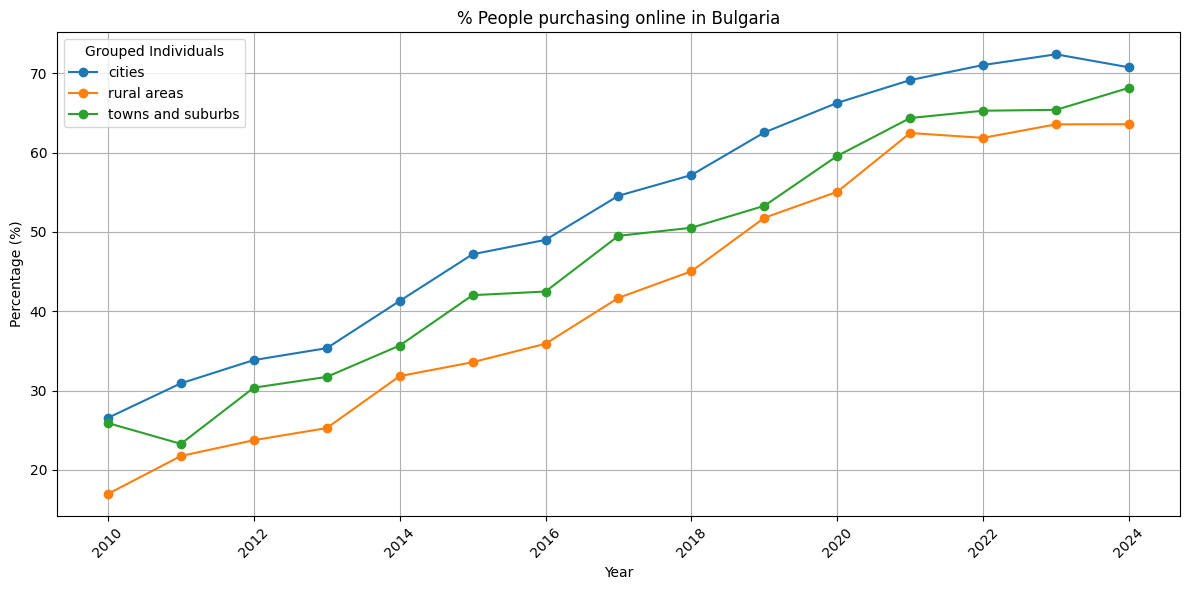

In [243]:
living_country_graphic("Spain")

# % Individuals purchasing online grouped by living place - Region Pick

In [244]:
# lets try doing a function:

def living_region_graphic(region_pick):
    filtered_df2 = df_per_regionall[df_per_regionall['region'] == region_pick] #filtering region
    filtered_df2 = filtered_df2.groupby('grouped_individuals').mean(numeric_only=True) # calculating mean for all the countries per living place
    filtered_df2 = filtered_df2.T # TRANSPOSING!
    plt.figure(figsize=(12, 6))

    for column in filtered_df2.columns:
        plt.plot(filtered_df2.index, filtered_df2[column], marker='o', label=column)

    # Customize the plot
    plt.title(f"% People purchasing online in {region_pick}")
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Grouped Individuals')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

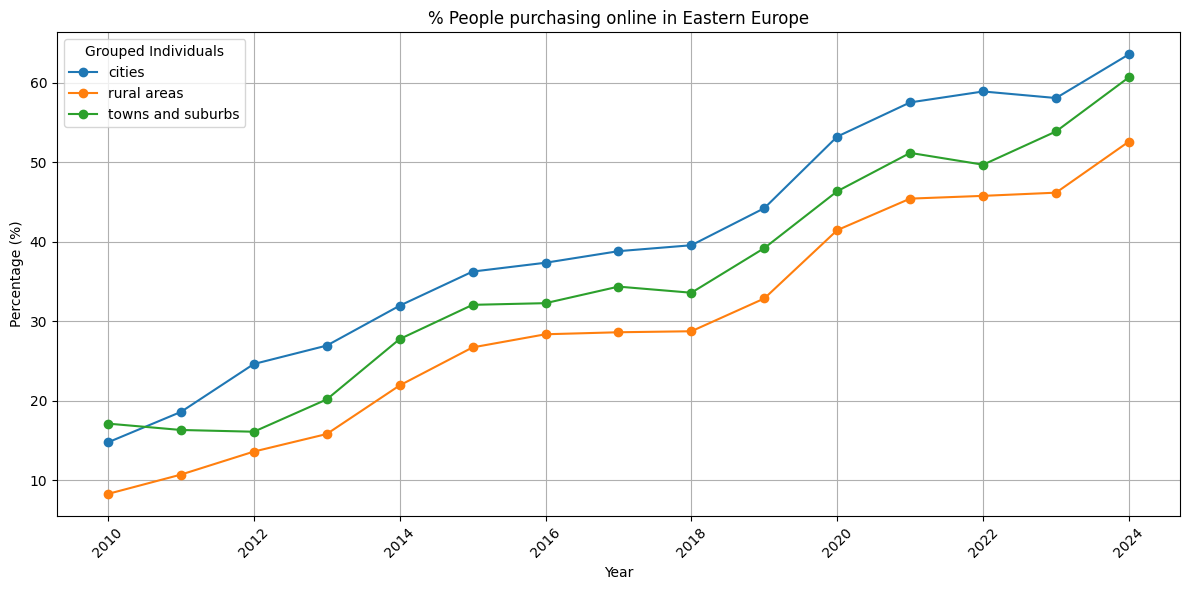

In [245]:
living_region_graphic("Eastern Europe")

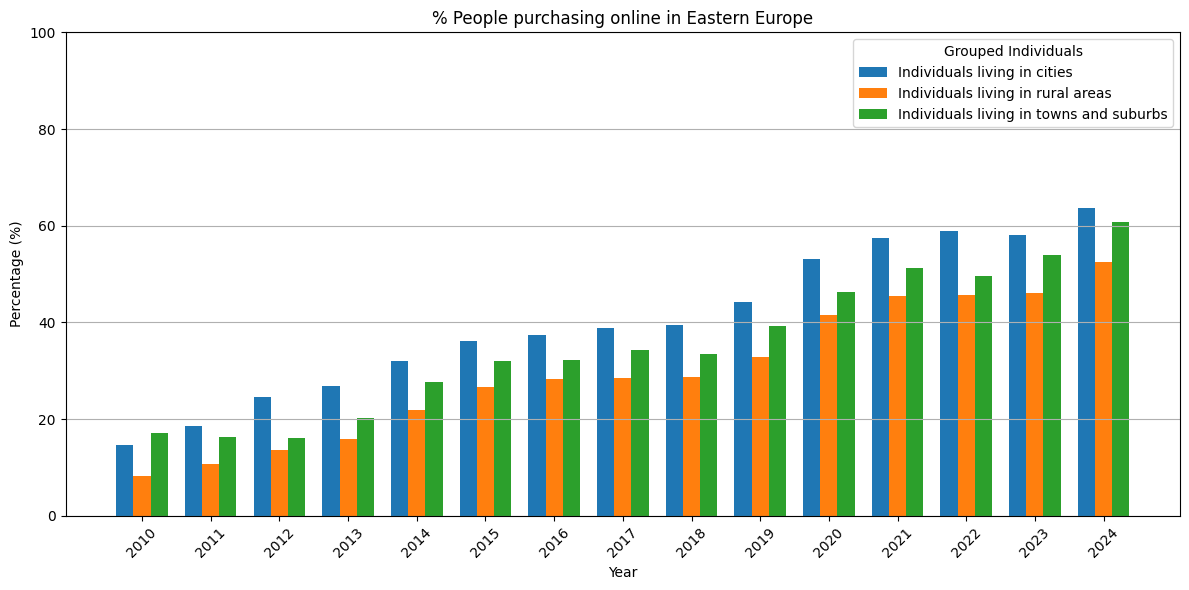

In [215]:

# Example function definition
def living_region_graphic(region_pick):
    # Filter the DataFrame for the specified region
    filtered_df2 = df_per_regionall[df_per_regionall['region'] == region_pick]
    
    # Calculate the mean for all countries per category ('grouped_individuals')
    filtered_df2 = filtered_df2.groupby('grouped_individuals').mean(numeric_only=True)
    
    # Transpose the DataFrame to have years as index and categories as columns
    filtered_df2 = filtered_df2.transpose()
    
    # Set up the bar plot
    plt.figure(figsize=(12, 6))
    
    # The range of years from the DataFrame index
    years = filtered_df2.index
    
    # Plot each category as its own series of bars
    bar_width = 0.25  # Width of the bars
    indices = pd.Series(range(len(years)))
    
    for i, column in enumerate(filtered_df2.columns):
        plt.bar(indices + i * bar_width, filtered_df2[column], width=bar_width, label=column)
    
    # Configure axis ticks to align with the middle of the groups of bars
    plt.xticks(indices + bar_width, years, rotation=45)
    
    # Customize the plot
    plt.title(f"% People purchasing online in {region_pick}")
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)  # Set limit to 100% for y-axis
    plt.legend(title='Grouped Individuals')
    plt.grid(True, axis='y')  # Display grid only for y-axis
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
living_region_graphic('Eastern Europe')

In [ ]:
# individials per per living place same region

# % Individuals purchasing online grouped by living place - Region Pick

In [240]:
df_per_regionall['grouped_individuals'] = df_per_regionall['grouped_individuals'].str.replace("Individuals living in ", "", regex=False) # removing "Last online purchase: " from column indic_is

def region_living_graphic(living_place_pick):

    filtered_df3 = df_per_regionall[df_per_regionall['grouped_individuals'] == living_place_pick] #filtering grouped_individuals
    filtered_df3 = filtered_df3.groupby('region').mean(numeric_only=True) # calculating mean for all the countries per living place
    filtered_df3 = filtered_df3.T # TRANSPOSING!
    plt.figure(figsize=(12, 6))
    for column in filtered_df3.columns:
        plt.plot(filtered_df3.index, filtered_df3[column], marker='o', label=column)

    # Customize the plot
    plt.title(f"% People purchasing online in {living_place_pick}")
    plt.xlabel('Year')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Grouped Individuals')
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

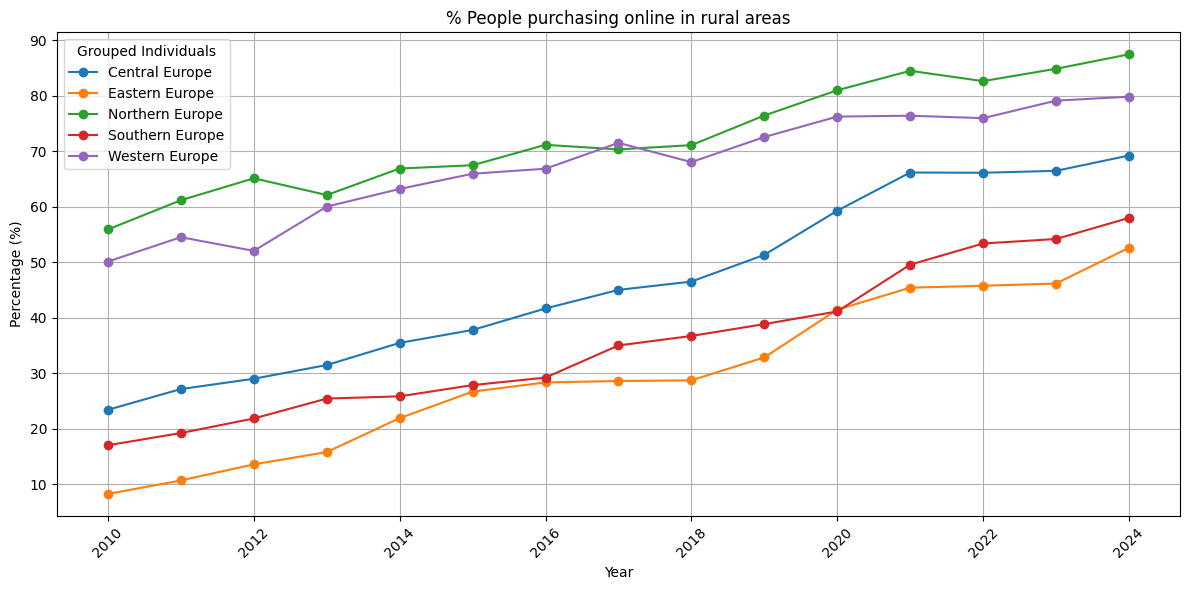

In [241]:
region_living_graphic("rural areas") # 3 options: cities / rural areas / towns and suburbs